# POLYNOMIAL REGRESSION

Well earlier even on polynomial functions we were trying to fit straight lines, but now we have better choice. That is to fit in polynomial functions in the data, using Polynomial regression.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

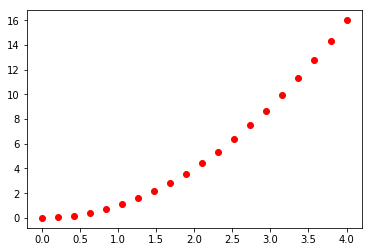

In [2]:
x = np.linspace(0,4,20)
y = x**2  #creating a y=x^2 function
plt.plot(x,y, marker='o', linestyle='None', color='r')

In [3]:
import pandas as pd
data_dict = { 'x':x/4, 'x^2': y/16 ,'results':y/16}  #feature scaling
data = pd.DataFrame(data_dict)
print(data.head(5))
print(data.tail(5))

    results         x       x^2
0  0.000000  0.000000  0.000000
1  0.002770  0.052632  0.002770
2  0.011080  0.105263  0.011080
3  0.024931  0.157895  0.024931
4  0.044321  0.210526  0.044321
     results         x       x^2
15  0.623269  0.789474  0.623269
16  0.709141  0.842105  0.709141
17  0.800554  0.894737  0.800554
18  0.897507  0.947368  0.897507
19  1.000000  1.000000  1.000000


Now our data frame is ready, so let us write the Polynomial Regression function.

In [4]:
def Multivar_gradient_descent(x, y, lt, iterations, plot_on):
    x = x.values
    a=[]
    t = x.shape[0]
    for i in range(t):
        a.append(1)
    b = np.array(a).reshape((t,1))
    x = np.concatenate((b,x), axis=1)
    y = y.values
    
    no_of_params = x.shape[1] 
    theta = np.random.rand(no_of_params).reshape((no_of_params))
    m = x.shape[0] 
    
    learning_rate = lt

    #magic function to support plotting within notebook
    %matplotlib notebook
    plt.ion()

    def mean_error(theta, x, j, m):
      sum_mean = 0
      for i in range(m):
        hx =  np.dot(np.transpose(theta),x[i])
        sum_mean += (hx - y[i])*x[i][j]
      return sum_mean/m

    def perform_cal(theta, x, y, t):
      temp_arr = []
      for i in range(no_of_params):
        temp = theta[i] - learning_rate*mean_error(theta,x,i,m)
        temp_arr.append(temp)
      return temp_arr

    if plot_on:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    #As we are appending a coloumn to x with all 1's as the index 0 coloumn
    #hence we need the index 1 coloumn as the x axis to plot the graph.
    x_axis = x[:,1:2]    
    for i in range(iterations):
        theta = perform_cal(theta, x, y, m)
        y_pred = theta[0]+(theta[1]*x_axis)+theta[2]*(x_axis**2)
        if plot_on:
            ax.clear()
            ax.plot(x_axis, y, color='r',marker='o', linestyle='None')
            ax.plot(x_axis, y_pred)  
            fig.canvas.draw()

    %matplotlib inline
    if plot_on:
        plt.show()
    print(theta)
    return theta

In Polynomial Regression we predict a polynomial function to fit the data. That is our hypothesis function looks something like this:

   h(x) = $\theta_{0}$ + $\theta_{1}*X$ + $\theta_{2}*X^{2}$ + .... + $\theta_{n}* X^{n}$

So we are trying to predict the values of $\theta_{0}$,$\theta_{1}$ and $\theta_{2}$ in this case to fit our y = $x^{2}$ function. 
As it is evident the values predicted by the model should be $\theta_{0} = 0$,$\theta_{1} = 0$ and $\theta_{2} = 1$, or somewhere very close to this values.

Also when you will run this notebook in your system, you would see a live graph moving as theta value changes and trying to best fit the data with every increasing iteration.

<IPython.core.display.Javascript object>


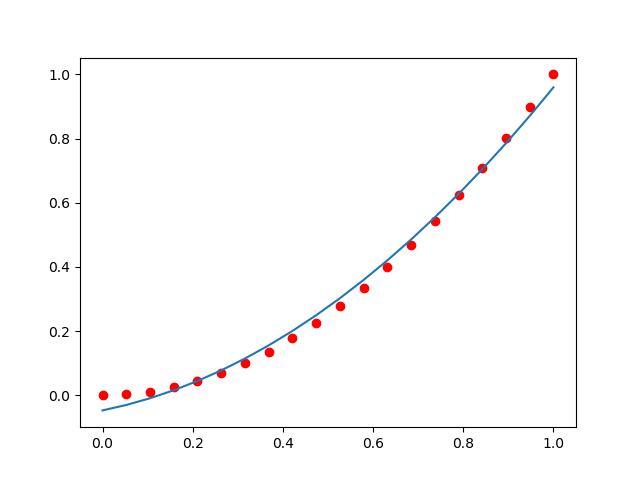

[-0.0467881490813684, 0.28336613429684215, 0.7230058513923941]
y = -0.0467881490813684 + 0.28336613429684215 * x + 0.7230058513923941 *x^2


In [6]:
X = data[['x','x^2']]
Y = data['results']
theta = Multivar_gradient_descent(X, Y, 0.068, 500, True)
print( 'y =', theta[0] ,'+',theta[1],'* x','+',theta[2],'*x^2' )

Now that is a perfect prediction.

Let us also analyze the efficiency in the value predicted as the no. of iterations increases.

Note that I have included the plot_on parameter in the function declaration, to give me the freedom to chose whether to plot the live graph or just get the end result.

[-0.05963596248790097, 0.3929721831719003, 0.6029627147444379]
[-0.07477657103917648, 0.43662565851693563, 0.5797859898271013]
[-0.06994733966560614, 0.40765629301458817, 0.607991030069331]
[-0.03092632932335445, 0.1802353974010033, 0.8266846556255909]


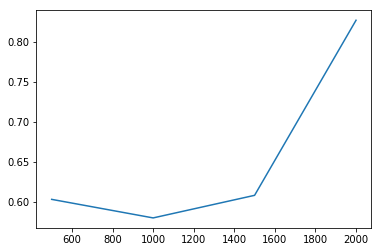

In [14]:
plt.ioff()
iterations = [500, 1000, 1500, 2000]
theta_2 = []
for i in iterations:
    theta = Multivar_gradient_descent(X, Y, 0.06, i, False)
    theta_2.append(theta[2])
plt.plot(iterations, theta_2)
plt.show()

So we see that as the no. of iterations increases we get the coefficient more close to 1.
But also the time to compute the model increases with the increase in the no. of iterations. Hence generally there's a trade of in between those. 

We can get a good model even with less number of iterations if our learning rate is optimised. I will make a notebook on best practices to decide learning rate soon.